# Random Forest Model for Fraud check

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df["Taxable.Income"] = np.where((df["Taxable.Income"]<30000), "Risky", "Good")
df.sample(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
128,NO,Married,Good,100897,27,YES
310,YES,Divorced,Good,189435,22,YES
232,YES,Married,Risky,150349,2,NO
230,NO,Married,Risky,81593,14,YES
407,NO,Single,Good,52144,6,NO
228,NO,Married,Risky,100696,9,YES
493,NO,Married,Risky,103226,29,NO
99,NO,Married,Good,114350,12,NO
346,NO,Single,Risky,134635,30,YES
72,YES,Divorced,Good,108300,27,YES


In [6]:
df["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

### One hot encoding

In [7]:
data=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=False)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


### Pairplot

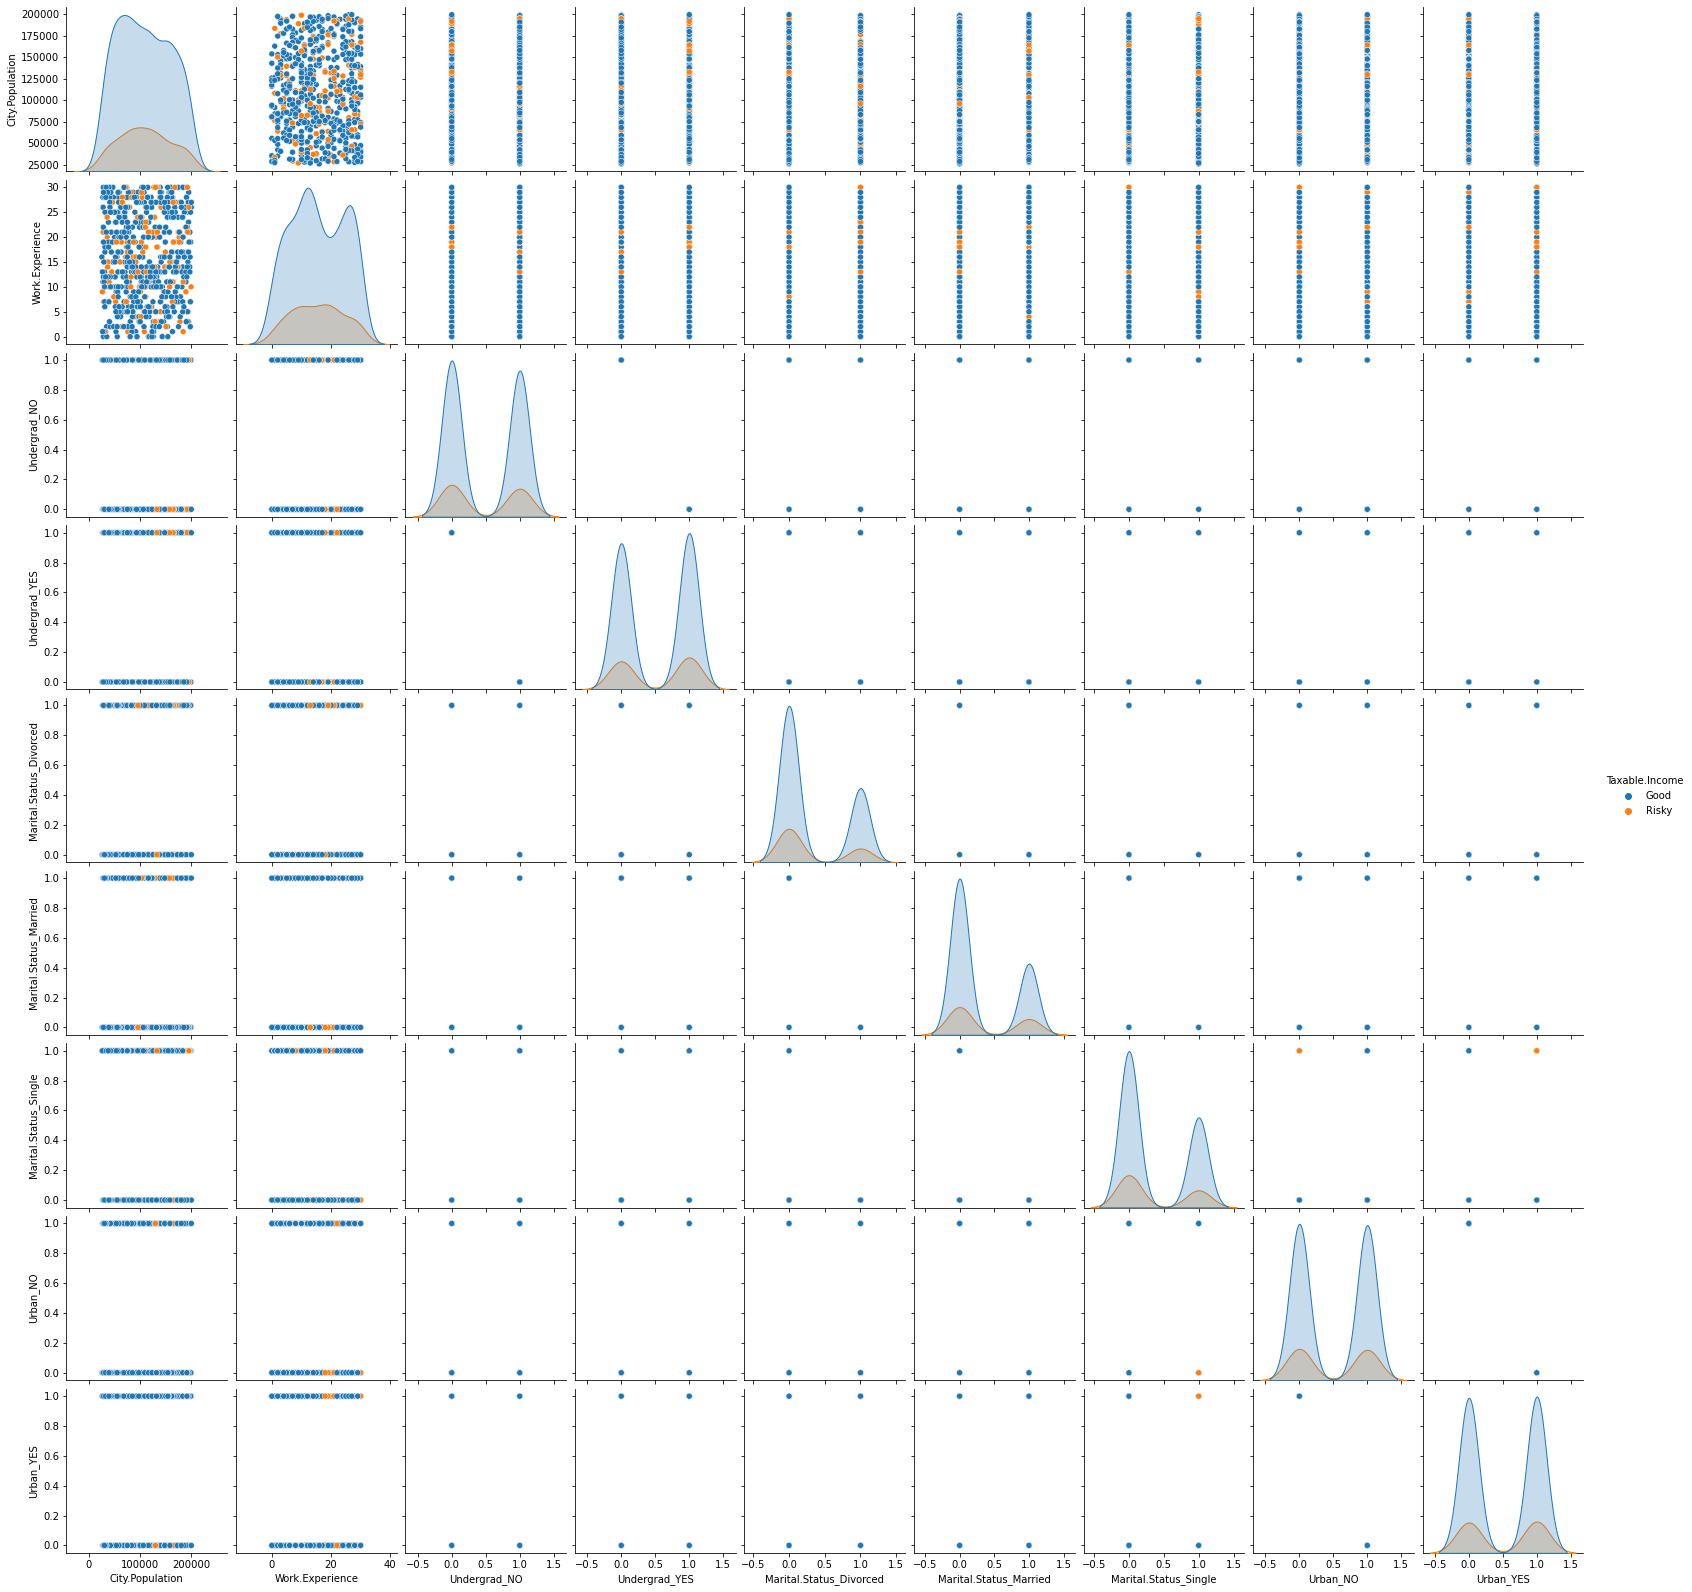

In [8]:
import seaborn as sns
sns.pairplot(data=data, hue = 'Taxable.Income')

### Labeling

In [9]:
data["Taxable.Income"] = data["Taxable.Income"].astype('category')
data["Taxable.Income"] = data["Taxable.Income"].cat.codes
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


### Normalising the data

In [10]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

df_norm = norm_func(data)
df_norm.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
590,0.0,0.341473,0.466667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
591,1.0,0.615406,0.600000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
592,0.0,0.283703,0.533333,0.0,1.0,0.0,0.0,1.0,1.0,0.0
593,0.0,0.610256,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0
594,0.0,0.412341,0.300000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
595,0.0,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.0,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.0,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.0,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0
599,0.0,0.760683,0.533333,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [11]:
X = df_norm.drop(['Taxable.Income'], axis=1)
Y = df_norm['Taxable.Income']

### Splitting the data into training and testing

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

### Bagging Classifier

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

In [14]:

num_trees = 100

model = BaggingClassifier( max_samples=0.8,n_estimators=num_trees,random_state=8)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

0.7366666666666667


73.66 % Accuracy for whole data   i,e. model trained with whole data

In [15]:
num_trees = 100

model = BaggingClassifier( max_samples=0.8,n_estimators=num_trees,random_state=8)
model.fit(x_train,y_train)

pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83        94
         1.0       0.00      0.00      0.00        26

    accuracy                           0.71       120
   macro avg       0.38      0.45      0.41       120
weighted avg       0.60      0.71      0.65       120



71 % Accuracy for test data

### Random forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
num_trees = 100
max_features = 6

model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=8)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())


0.75


75 % Accuracy for whole data

### AdaBoost Classifier

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
num_trees = 10
model = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.8,random_state=9)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

0.7916666666666667


### HyperParameter Tunning for Learning rate

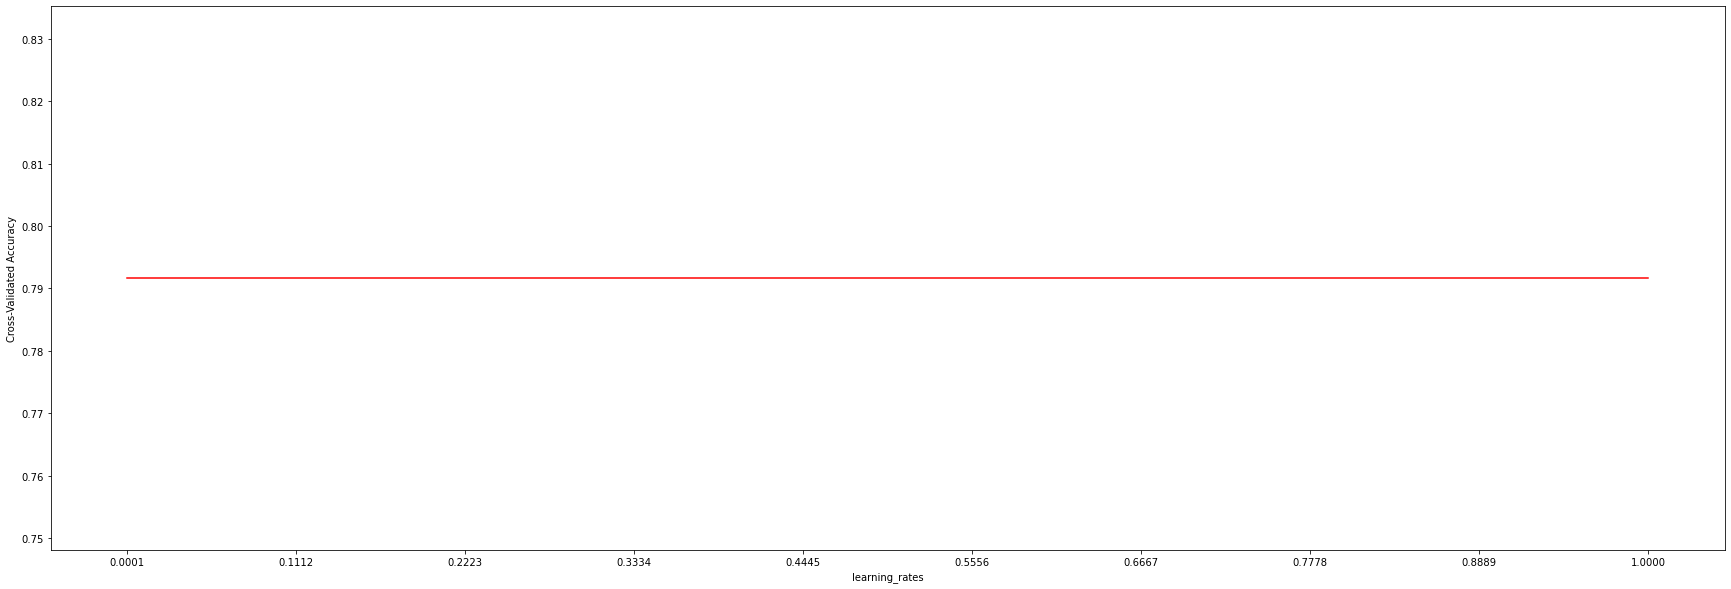

In [20]:
learning_rates = np.linspace(0.0001,1,10)
k_scores = []


# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for learning_rate in learning_rates:
    ab =  AdaBoostClassifier(n_estimators=num_trees, learning_rate= learning_rate, random_state=9)
    scores = cross_val_score(ab, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(30,10))
plt.plot(learning_rates, k_scores,color="red")

plt.xlabel('learning_rates')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(learning_rates)
plt.show()

In [21]:
k_scores

[0.7916666666666667,
 0.7916666666666667,
 0.7916666666666667,
 0.7916666666666667,
 0.7916666666666667,
 0.7916666666666667,
 0.7916666666666667,
 0.7916666666666667,
 0.7916666666666667,
 0.7916666666666667]

### Stacking Ensemble for Classification


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

#### Create the sub models

In [23]:
kfold = KFold(n_splits=10)

estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=10)
print(results.mean())

0.7933333333333333


### Creating the ensemble model by voting for best estimators

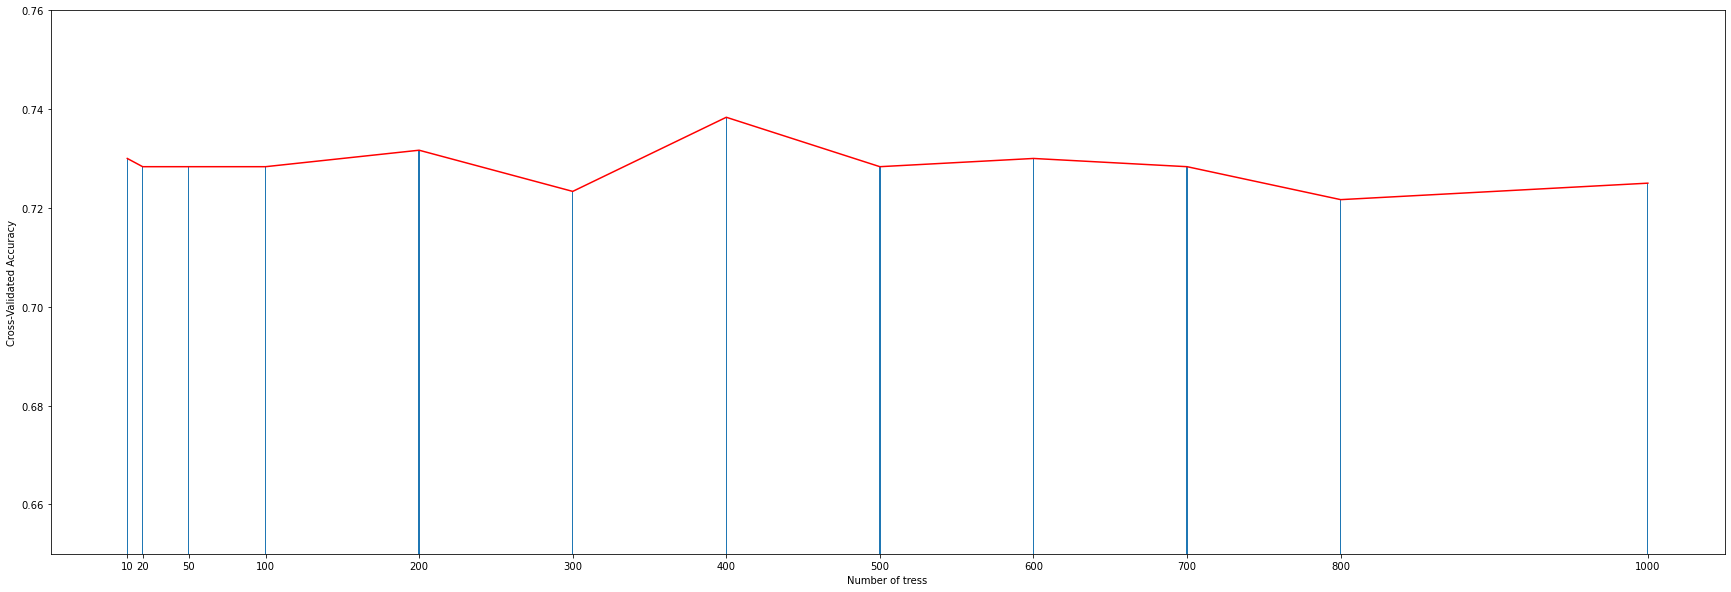

In [24]:
num_trees = [10,20,50,100,200,300,400,500,600,700,800,1000]
nf=[2,3,4,5,6]
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in num_trees:

    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, X, Y, cv=10)
    k_scores.append(scores.mean())
#plot to see clearly
plt.figure(figsize=(30,10))
plt.bar(num_trees, k_scores)
plt.plot(num_trees, k_scores,color="red")

plt.xlabel('Number of tress')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(num_trees)
plt.ylim(0.65,0.76)
plt.show()

By seeing the above plot best k_value is 10

In [25]:
rf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(rf, X, Y, cv=10)
scores.mean()

0.7283333333333334

74.1 % Accuracy with N_estimators = 10